In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import utils
import knn_validation

In [2]:
x = pd.read_csv("../Data_Crowdsourced_Mapping/training.csv",sep=",")
X_train = x.drop(columns=["class"])
y_train = x["class"]
x = pd.read_csv("../Data_Crowdsourced_Mapping/testing.csv",sep=",")
X_validation = x.drop(columns=["class"])
y_validation = x["class"]

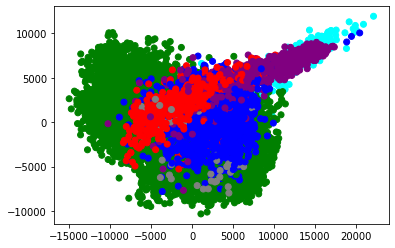

In [3]:
utils.plot_clustering(data=X_train,labels=y_train)
plt.show()

In [4]:
X = X_train 
y = y_train 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
lda_object = lda.fit(X, y)
X = lda_object.transform(X)


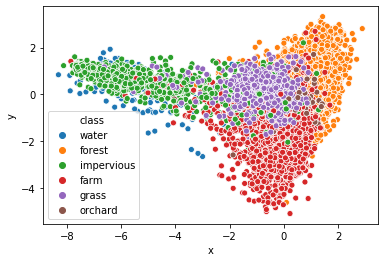

In [5]:
X = pd.DataFrame(X, columns=["x", "y"])
sns.scatterplot(x='x',y='y',hue=y,data=X) 
#https://stackoverflow.com/questions/57770383/plot-boundary-lines-between-classes-in-python-based-on-multidimensional-data

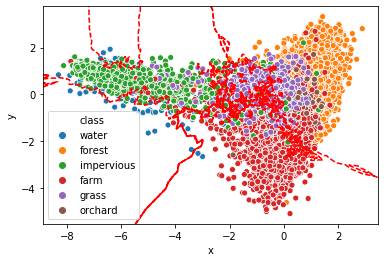

In [6]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X,y)
sns.scatterplot(x='x',y='y',hue=y,data=X) 
utils.add_decision_boundary(knn9)

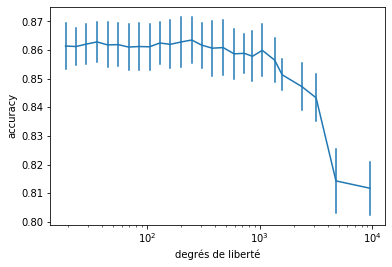

31

In [7]:
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500,30)).astype(int))
train_size = 0.90
n_splits = 10
gen = knn_validation.knn_multiple_validation(X, y, n_splits, train_size,n_neighbors_list)
df = pd.DataFrame(gen, columns=["# neighbors", "accuracy", "degrés de liberté"])
sp = sns.lineplot(x="degrés de liberté", y="accuracy",err_style="bars", ci="sd", data=df)
sp.set(xscale="log")
plt.show() 
Kopt = df.loc[df.accuracy.idxmax(), "# neighbors"]
Kopt

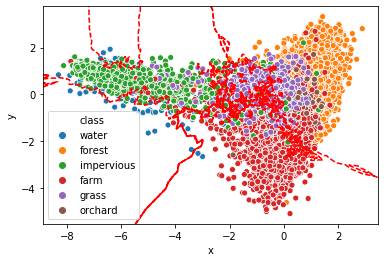

In [8]:
knn = KNeighborsClassifier(n_neighbors=Kopt)
knn.fit(X,y)
sns.scatterplot(x='x',y='y',hue=y,data=X) 
utils.add_decision_boundary(knn9)

In [9]:
X_valTransf = X_validation 
y_valTransf = y_validation

X_valTransf = sc.transform(X_valTransf)
X_valTransf = lda_object.transform(X_valTransf)

X_valTransf= pd.DataFrame(X_valTransf, columns=["x", "y"])

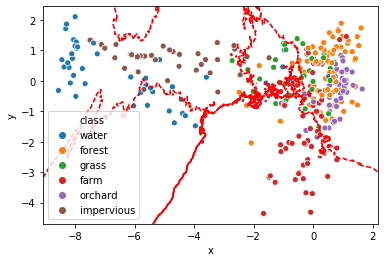

In [10]:
sns.scatterplot(x='x',y='y',hue=y_valTransf,data=X_valTransf) 
utils.add_decision_boundary(knn)

In [11]:
y_pred = knn.predict(X_valTransf)
accuracy_score(y_pred, y_valTransf)

0.5366666666666666